In [39]:
# PARAMETERS
path = 'img/'  # 원본이미지 경로
proc_path = 'proc_img/'  # 이진화 후 이미지 경로
sp_path = 'sp_img/'  
filename = 'image02.png'
sp_filename = filename.split('.')
proc_filename = sp_filename[0] + '_proc.' + sp_filename[1]
# plt.style.use('dark_background')

In [40]:
# 이미지 출력 함수
def imshow(img):
    plt.figure(figsize=(20, 10))
    plt.imshow(img, cmap='gray')
    plt.show()

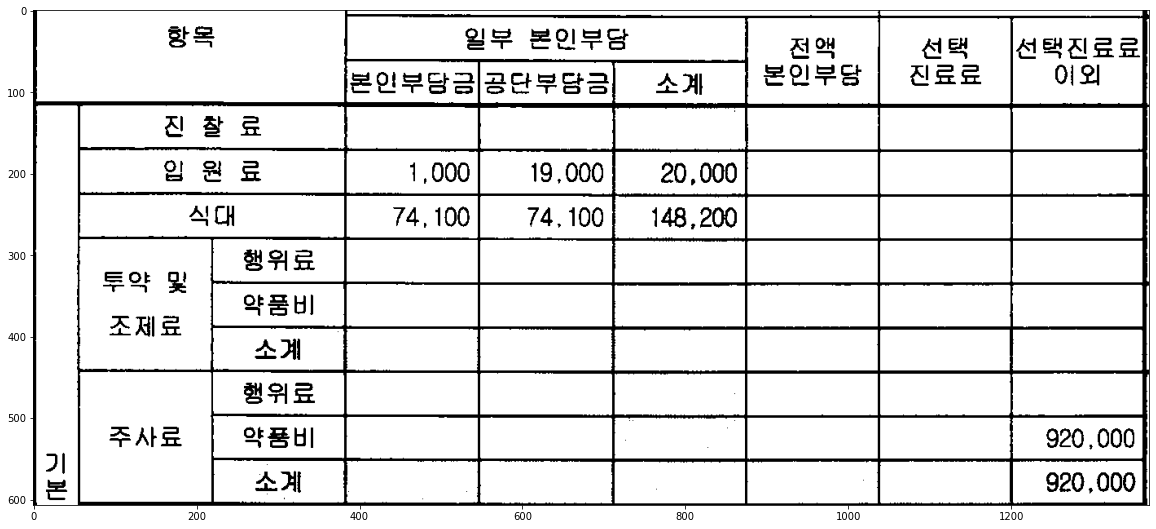

In [41]:
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img_dim = img.shape

# 이진화
bi_thr = 200
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)

cv2.imwrite(proc_path+proc_filename, bi_img)
imshow(bi_img)

* 이미지크기 확인

In [42]:
bi_img.shape

(607, 1370)

* 평균구하기

In [43]:
row_mean = np.mean(bi_img, axis=1)  # row 평균
col_mean = np.mean(bi_img, axis=0)  # col 평균

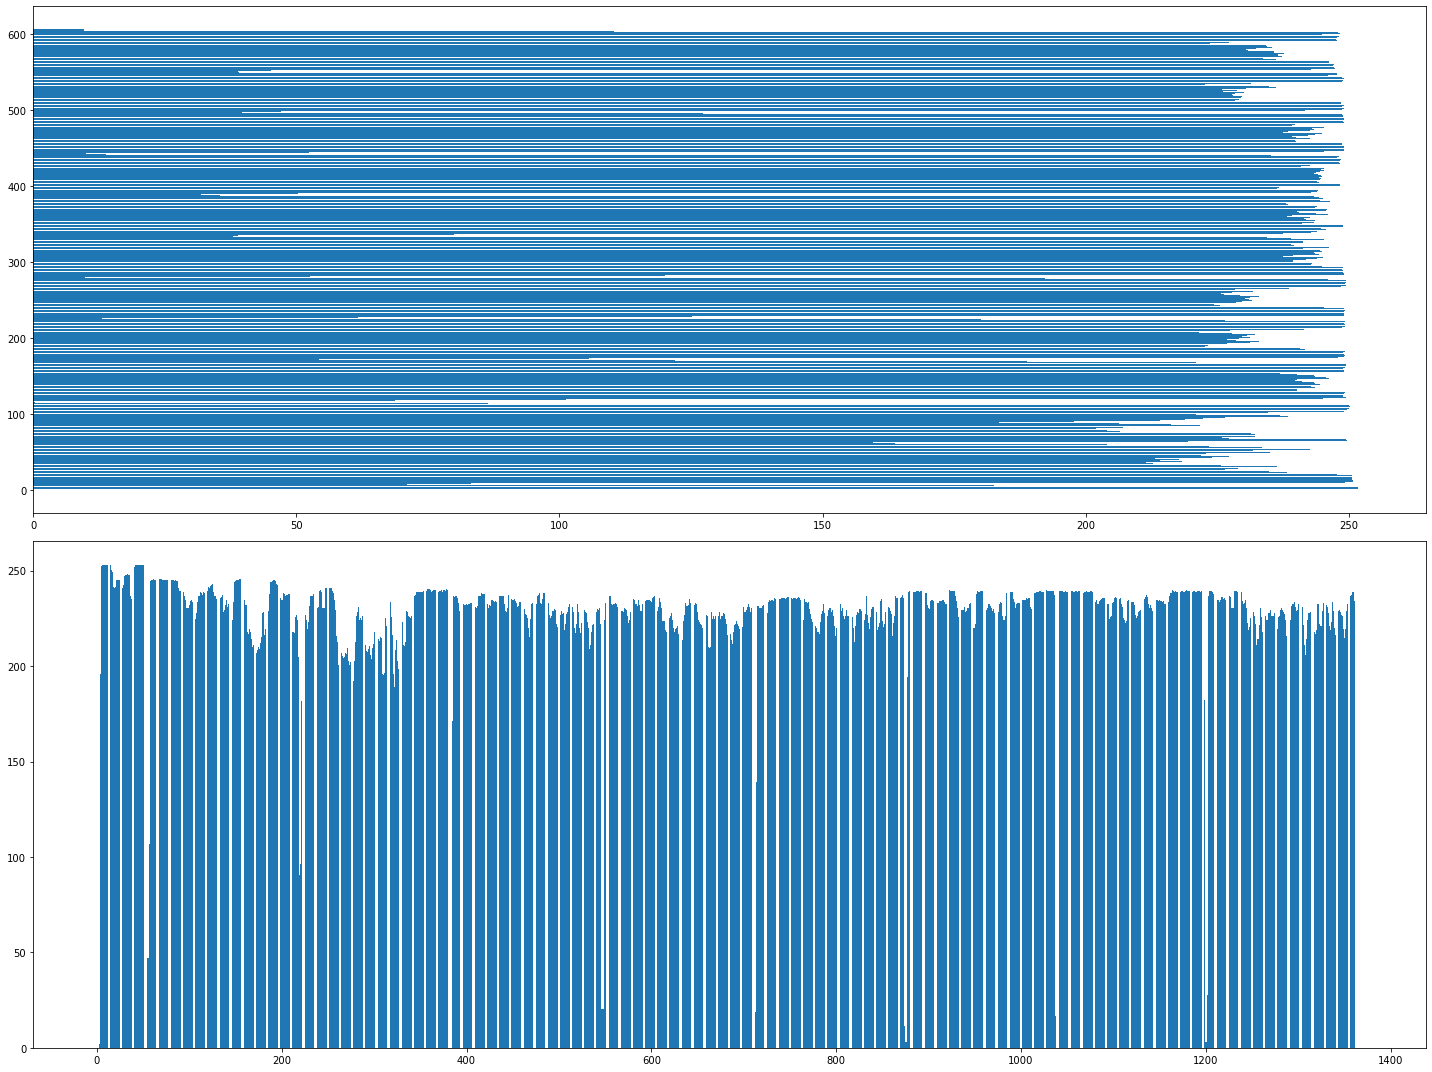

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax[0].barh(y=range(len(row_mean)), width=row_mean)
ax[1].bar(x=range(len(col_mean)), height=col_mean)
plt.tight_layout()

* 라인 영역 구하기

In [45]:
min_thr, max_thr = 0, 190  # 평균 밝기값이 0 ~ 190 인 영역을 line 이라고 가정
line_row_idx = [id_ for id_, value in enumerate(row_mean) if min_thr <= value < max_thr]
line_col_idx = [id_ for id_, value in enumerate(col_mean) if min_thr <= value < max_thr]

* 경계선 지우기

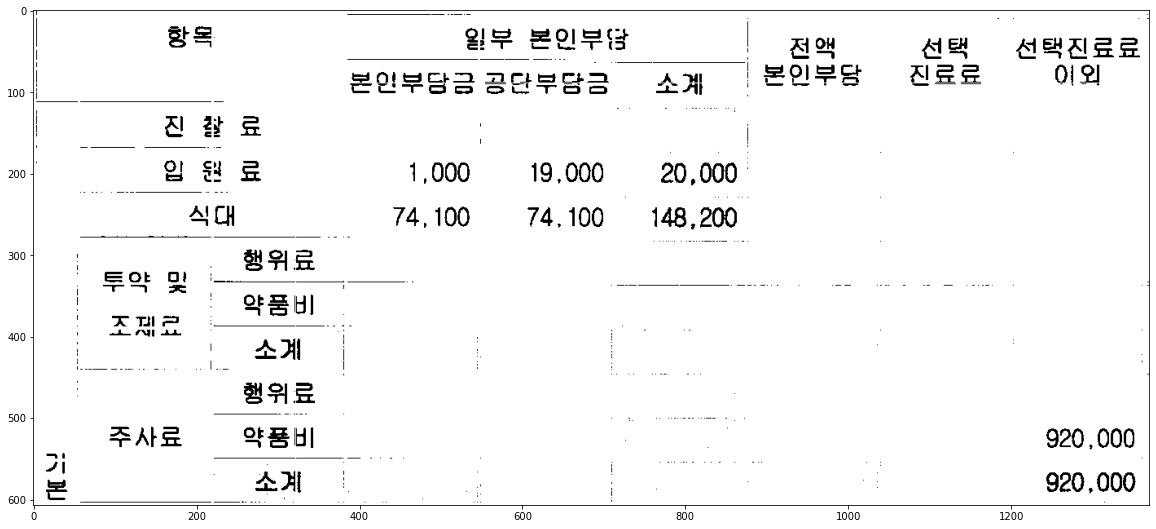

In [46]:
mod_img = copy.deepcopy(bi_img)  # 이미지 복사
# line 에 해당하는 index를 255로 바꿈
for row_id in line_row_idx:
    mod_img[row_id] = 255
for col_id in line_col_idx:
    mod_img[:, col_id] = 255
    
imshow(mod_img)

* 라인 제거 후 밝기값 확인

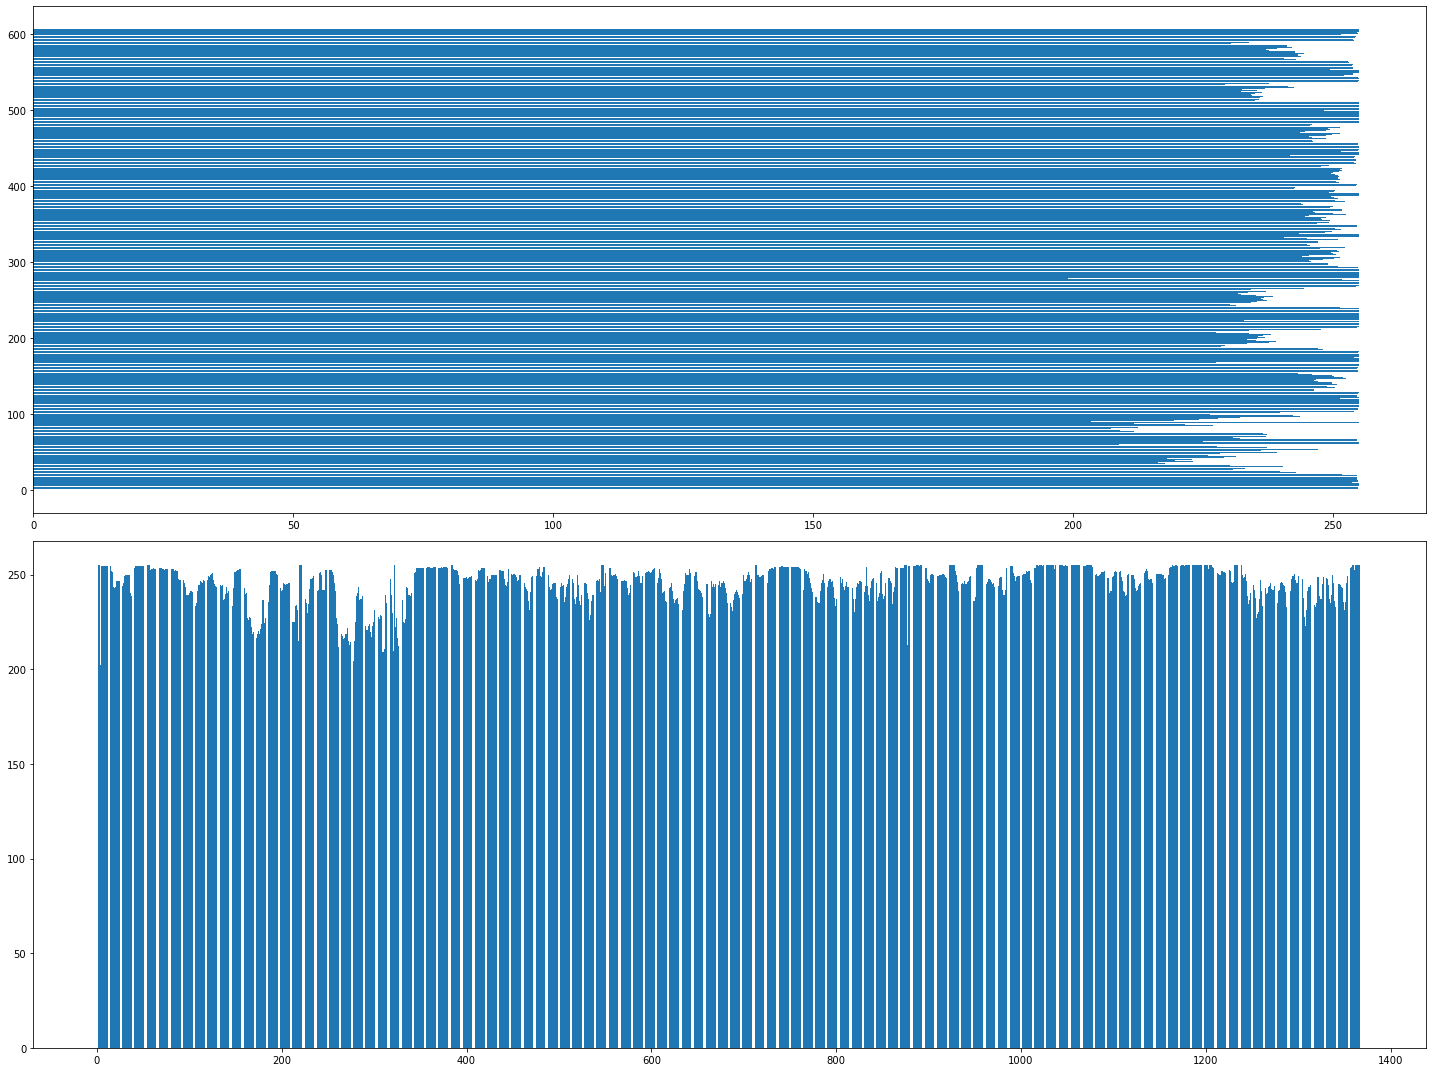

In [47]:
row_mean_rm_line = np.mean(mod_img, axis=1)
col_mean_rm_line = np.mean(mod_img, axis=0)

fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax[0].barh(y=range(len(row_mean_rm_line)), width=row_mean_rm_line)
ax[1].bar(x=range(len(col_mean_rm_line)), height=col_mean_rm_line)
plt.tight_layout()

* 텍스트 영역 id 지정

In [48]:
min_text_thr = 210
max_text_thr = 250

text_row_idx = [id_ for id_, val in enumerate(row_mean_rm_line) if min_text_thr <= val < max_text_thr]
text_col_idx = [id_ for id_, val in enumerate(col_mean_rm_line) if min_text_thr <= val < max_text_thr]

* 텍스트 영역 범위 지정

In [49]:
def get_diff(idx):
    diff_ls = list()
    for n, id_ in enumerate(idx):
        if n == len(idx) - 1:
            diff_ls.append(0)
        else:
            diff = idx[n+1] - idx[n]
            diff_ls.append(diff)
    return diff_ls

# 인덱스 차이값
text_row_diff = get_diff(text_row_idx)
text_col_diff = get_diff(text_col_idx)

* 텍스트 영역 확인

In [50]:
ori_img = cv2.imread(path+filename)

In [51]:
text_img = copy.deepcopy(ori_img)
for row in text_row_idx:
    text_img = cv2.line(text_img, (0, row),(text_img.shape[1], row),(150, 0, 0), 1)
    
cv2.imshow('line', text_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
# 텍스트 영역 확인(col)
text_img = copy.deepcopy(ori_img)
for col in text_col_idx:
    text_img = cv2.line(text_img, (col, 0),(col, text_img.shape[0]),(0, 150, 0),1)
    
cv2.imshow('line', text_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
# 텍스트 영역 확인(row, col)
text_img = copy.deepcopy(ori_img)
for col in text_col_idx:
    text_img = cv2.line(text_img, (col, 0),(col, text_img.shape[0]),(0, 150, 0),1)
    
for row in text_row_idx:
    text_img = cv2.line(text_img, (0, row),(text_img.shape[1], row),(150, 0, 0), 1)
    
cv2.imshow('line', text_img)
cv2.waitKey(0)
cv2.destroyAllWindows()